<a href="https://colab.research.google.com/github/Saurabhpatil-dev/Stock_pred_model/blob/main/Stock_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                      Stock Prediction Model
##Description : This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a coopration (Apple inc.) using the past 60 day stock price.

## Import the required packages

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

##Get the stock quote and show it

In [ ]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-01-07')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.737653
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.879066
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013701
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.993060
...,...,...,...,...,...,...
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.783936
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.444603
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.720840


## Getting the insights of the Data

In [ ]:
df.shape

(2016, 6)

## Visualizing the closing price

Text(0, 0.5, 'CLose Price USD ($)')

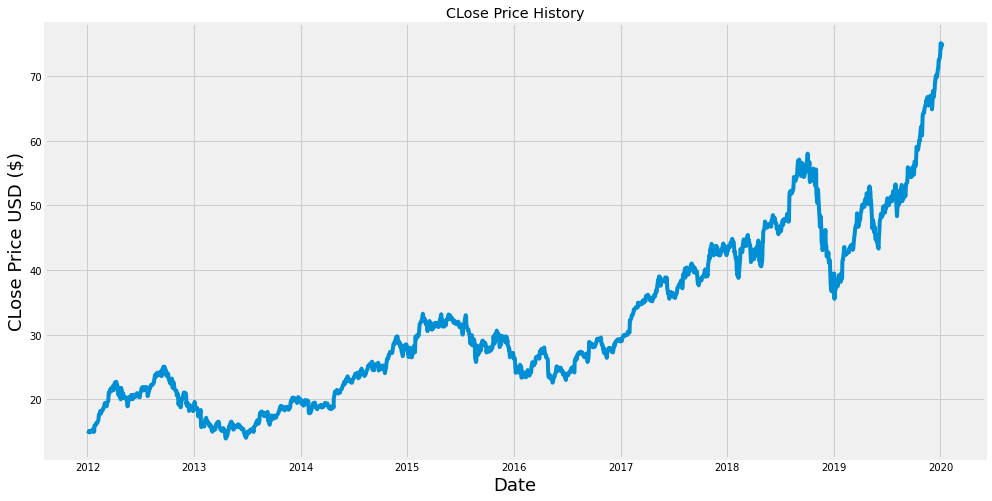

In [ ]:
plt.figure(figsize=(15,8))
plt.title('CLose Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('CLose Price USD ($)', fontsize=18)

## Create a new dataframe with only the 'CLose Column'

In [ ]:
data = df.filter(['Close'])

## Convert the dataframe to a numpy array

In [ ]:
dataset = data.values

## Get the number of rows to train the model on

In [ ]:
training_data_len = math.ceil(len(dataset) * .8 )         # The math.ceil() method rounds a number UP to the nearest integer, if necessary, and returns the result.
training_data_len

1613

## Scale the data 

Why do we need scaling ?

  Machine learning algorithm just sees number — if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training the model.

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01209168],
       [0.01338262],
       [0.01606383],
       ...,
       [0.98806014],
       [0.99775099],
       [0.99198564]])

##  Create the training dataset


In [ ]:
# Create the sceled training dataset
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train dataset
x_train = []
y_train = []

# Creating the bacth of 60 for dataset

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])                           # Contains pas 60 values for training
  y_train.append(train_data[i, 0])                                # Contains the 61 value we want our model to predict
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.01209168, 0.01338262, 0.01606383, 0.01861652, 0.01822515,
       0.01910719, 0.01870414, 0.01802653, 0.01710359, 0.01996004,
       0.0225361 , 0.02174167, 0.01738982, 0.02154306, 0.01745408,
       0.03278774, 0.03160195, 0.03314992, 0.03649702, 0.03852398,
       0.03835458, 0.03772956, 0.04039324, 0.04289918, 0.04573812,
       0.05032362, 0.05995607, 0.0601021 , 0.06546452, 0.06947169,
       0.06258471, 0.06523669, 0.06518412, 0.07262022, 0.07156291,
       0.07351977, 0.07703629, 0.07899318, 0.08463012, 0.0887366 ,
       0.08992241, 0.09033716, 0.08331582, 0.08162179, 0.08187299,
       0.08847377, 0.09033133, 0.09432101, 0.10372563, 0.11627296,
       0.11392471, 0.11393054, 0.12300224, 0.12584118, 0.12382002,
       0.12197416, 0.12005234, 0.12643697, 0.13081803, 0.13265223])]
[0.1281192940788681]

[array([0.01209168, 0.01338262, 0.01606383, 0.01861652, 0.01822515,
       0.01910719, 0.01870414, 0.01802653, 0.01710359, 0.01996004,
       0.0225361 , 0.02174167, 0.017

## Convert the x-train and y_train to numpy array to use them for training the LSTM model.

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

## Reshape the data
 
 Why we need to reshape?
 
 LSTM model excepts the input data in 3-d, i.e in the form of number of samples, number of timestamps and number of features. But our data is 2-d.

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1553, 60, 1)

## Build the LSTM model

In [ ]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

## Compile model

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')          # Optimizer is used to improve the loss. Loss function is used to see how well our model performed.


## Train the model

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)                 # Epochs is the number of iterations the models goes through the data

1553/1553 [==============================] - 36s 21ms/step - loss: 0.0014


## Create a testing dataset

In [ ]:
# Create a  new array contaning scaled  values from index 1553 to 2003
test_data = scaled_data[training_data_len - 60:, :]

# Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, : ]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60 : i, 0])
  

## Convert the data to a numpy array

In [ ]:
x_test = np.array(x_test)

## Reshape the data

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## Get the models predicted price values

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


## Evaluate the Model

Get the Root mean squared error (RMSE). Lower the better the model

In [ ]:
rmse = np.sqrt(np.mean(predictions- y_test)**2)
rmse

0.447973379130399

## PLot the data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


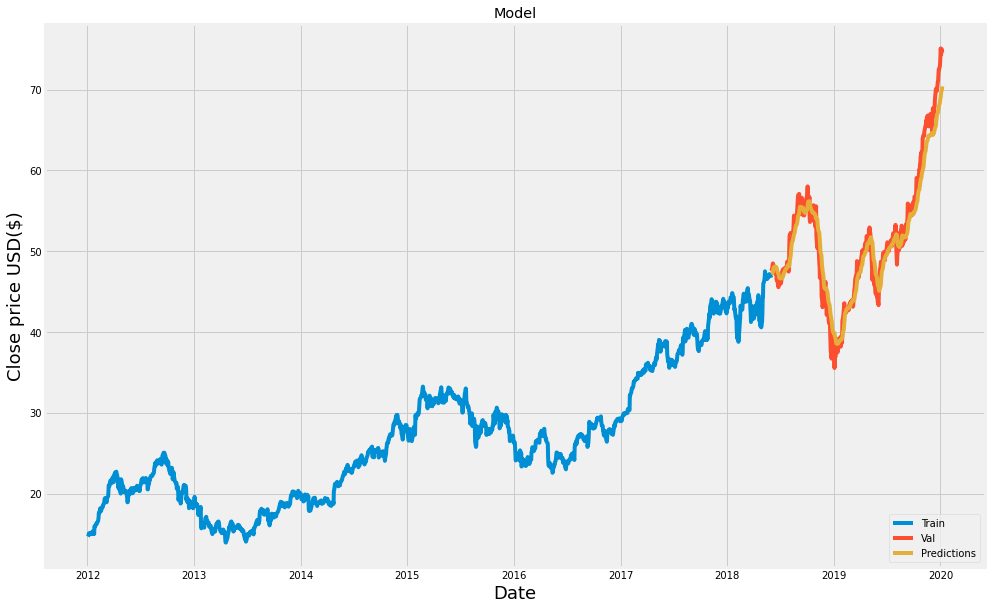

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data

plt.figure(figsize=(15,10))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## Show the valid and predicted price

In [ ]:
valid

,Close,Predictions
Date,,
2018-06-01,47.560001,47.141636
2018-06-04,47.957500,47.207554
2018-06-05,48.327499,47.340706
2018-06-06,48.494999,47.528442
2018-06-07,48.365002,47.737545
...,...,...
2019-12-31,73.412498,68.729004
2020-01-02,75.087502,69.100639
2020-01-03,74.357498,69.597466


# Get the quote

In [ ]:
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
# Create a new dataframe
new_df = apple_quote.filter(['Close'])

# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

# Scale the data  to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an emty list
X_test = []
 
# APpend the past 60 days 
X_test.append(last_60_days_scaled)

# Convert the X_test dataset to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price 
pred_price = model.predict(X_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[66.259125]]


In [ ]:
apple_quote_2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote_2['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
